In [1]:
from sympy import symbols, Function, Derivative, diff, simplify, Matrix, solve
from sympy.physics.mechanics import init_vprinting
import sympy as sp

# this is responsible to visualize time derivatives with dots
init_vprinting()

# then you need to define x as a functions of time
t, g, m_1, m_2, l_1, l_2, I_1, I_2 ,tau = symbols('t g m_1 m_2 l_1 l_2 I_1 I_2 tau')

theta_1 = Function("theta_1")(t)
theta_2 = Function("theta_2")(t)

# Now you can visualize derivatives with dots
theta_1_dot = Derivative(theta_1, t)
theta_2_dot = Derivative(theta_2, t)

theta_1_dot_dot = Derivative(theta_1_dot, t)
theta_2_dot_dot = Derivative(theta_2_dot, t)

In [2]:
KE_trans = (1/2)*(m_1*(l_1*theta_1_dot)**2 + m_2*(l_2*theta_1_dot)**2)
KE_rot   = (1/2)*(I_1*theta_1_dot**2 + I_2*(theta_1_dot + theta_2_dot)**2)
KE = KE_trans + KE_rot

PE = - g * sp.cos(theta_1)*(m_1*l_1 + m_2*l_2)

L = KE - PE
H = KE + PE

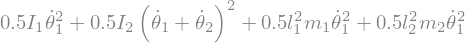

In [3]:
KE

In [4]:
PE

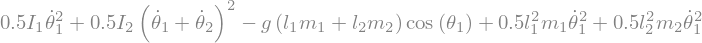

In [3]:
H

In [8]:
PE
# minimum gravitational potential energy is when theta1 is 0 or when the rod is at the bottom

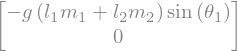

In [9]:
delL_deltheta1 = diff(L, theta_1)
delL_deltheta2 = diff(L, theta_2)

dL_dt = Matrix([delL_deltheta1,
                delL_deltheta2])

display(dL_dt)

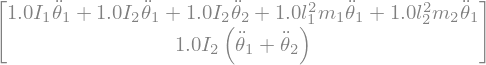

In [10]:
d_dt_delL_deltheta1dot = diff(diff(L, theta_1_dot), t)
d_dt_delL_deltheta2dot = diff(diff(L, theta_2_dot), t)

ddL_ddt = Matrix([d_dt_delL_deltheta1dot,
                  d_dt_delL_deltheta2dot])

display(simplify(ddL_ddt))

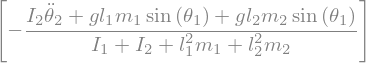

In [11]:
solve(d_dt_delL_deltheta1dot - delL_deltheta1, theta_1_dot_dot) 

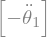

In [12]:
solve(d_dt_delL_deltheta2dot - delL_deltheta2, theta_2_dot_dot) 

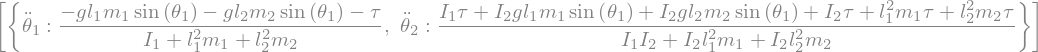

In [13]:
# these equations are correct(march 23 2024)
solve([d_dt_delL_deltheta1dot - delL_deltheta1, d_dt_delL_deltheta2dot - delL_deltheta2 - tau], [theta_1_dot_dot, theta_2_dot_dot], dict=True)